In [172]:
# imports

import torch
from torch_geometric.data import Data
from torch_geometric.transforms import BaseTransform
from torch_geometric.datasets import TUDataset, ZINC
from ogb.graphproppred import PygGraphPropPredDataset
import torch_geometric.utils as uts

import numpy as np
import matplotlib.pyplot as plt
import itertools

In [107]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, StratifiedKFold

In [3]:
import lib.experiments as experiments

In [4]:
from importlib import reload 

experiments = reload(experiments)

### Helper functions for plots

In [148]:
# make plots functions
def make_tree_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  n_trees = range(2,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_trees, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max tree size')
  ax.set_ylabel('test accuracy')
  plt.show()


def make_cycle_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  n_cycles = range(3,7)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cycles, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max cycle size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_clique_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  n_cliques = range(4,6)
  fig = plt.figure()

  ax = fig.add_subplot()
  [ax.plot(n_cliques, scores[i]) for i in range(8)]
  ax.set_title('Pattern graphs for ' + experiment.dataset_name)
  ax.set_xlabel('Max clique size')
  ax.set_ylabel('test accuracy')
  plt.show()

def make_big_plot(experiment):
  scores_dict = experiment.load_score_data('Random_forest')
  fig, (ax_trees, ax_cycles, ax_cliques) = plt.subplots(1,3, gridspec_kw={'hspace': 1.2}, sharey=True)

  tree_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape((8,5))
  cycle_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(8,5).transpose().reshape(10,4)
  clique_scores = np.array([scores_dict[i].mean() for i in range(40)]).reshape(2,20).transpose()
  
  n_trees = range(2,7)
  n_cycles = range(3,7)
  n_cliques = range(4,6)

  fig.suptitle('Pattern graphs for ' + experiment.dataset_name)

  [ax_trees.plot(n_trees, tree_scores[i]) for i in range(8)]
  ax_trees.set_xlabel('Max tree size')

  [ax_cycles.plot(n_cycles, cycle_scores[i]) for i in range(10)]
  ax_cycles.set_xlabel('Max cycle size')


  [ax_cliques.plot(n_cliques, clique_scores[i]) for i in range(10)]
  ax_cliques.set_xlabel('Max clique size')

  # common axis labels
  #fig.supxlabel('fig.supxlabel')
  fig.supylabel('test accuracy')   

  fig.set_dpi(90)
  plt.show()





In [136]:
def leaderboard(experiment, n):
    score_dict = experiment.load_score_data('Random_forest')
    mean_list = [(k.mean(), i) for i,k in score_dict.items()]
    sorted_scores = list(reversed(sorted(mean_list)))
    data_dict = experiment.load_data(get_value = True)
    table = [(i, data_dict[i].nums, score, score_dict[i].std()) for (score,i) in sorted_scores]

    return table[:n]

In [135]:
def tsne_vis(experiment, i, pca_num = None):
    if pca_num != None: 
        X = PCA(n_components = 10).fit_transform()
    data_dict = experiment.load_data(get_value = True)
    X, y = data_dict[23].X, data_dict[2].y
    X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
    plt.scatter(X_embedded[(y==1).squeeze(),0], X_embedded[(y==1).squeeze(),1], c='green', label = '0')
    plt.scatter(X_embedded[(y==0).squeeze(),0], X_embedded[(y==0).squeeze(),1], c='red', label = '1')
    plt.legend()
    plt.show()
    

## load experiment data

### MUTAG

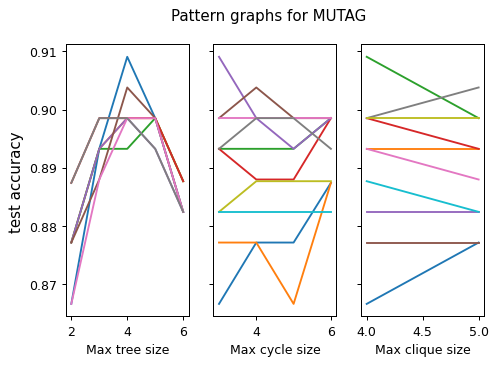

In [182]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/MUTAG', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'MUTAG')
#leaderboard(experiment, 5)
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
make_big_plot(experiment)


In [183]:
leaderboard(experiment, 5)

[(2,
  {'n_trees': 4, 'n_cycles': 3, 'n_cliques': 4},
  0.9090643274853802,
  0.06880297763571958),
 (27,
  {'n_trees': 4, 'n_cycles': 4, 'n_cliques': 5},
  0.9038011695906434,
  0.06345029239766081),
 (37,
  {'n_trees': 4, 'n_cycles': 6, 'n_cliques': 5},
  0.8985380116959065,
  0.07017604775564068),
 (3,
  {'n_trees': 5, 'n_cycles': 3, 'n_cliques': 4},
  0.8985380116959065,
  0.08450292397660819),
 (36,
  {'n_trees': 3, 'n_cycles': 6, 'n_cliques': 5},
  0.8985380116959064,
  0.06611097532258428)]

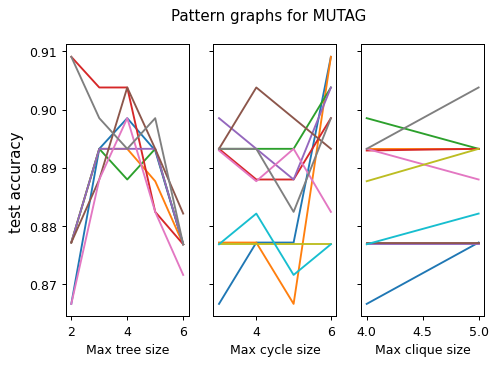

In [159]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/MUTAG', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'MUTAG')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
make_big_plot(experiment)

In [176]:
import networkx as nx
graph = uts.from_networkx(nx.cycle_graph(3))
embed = experiments.ExperimentEmbedding(graph)

In [179]:
embed.set_testgraphs(n_trees=2, n_cycles=6, n_cliques=4)

In [180]:
list(map(lambda x: x.name, embed.testgraphs))

['c_3', 'c_5', 'c_4', 'single_vertex']

In [93]:
leaderboard(experiment, 5)

[(35,
  {'n_trees': 2, 'n_cycles': 6, 'n_cliques': 5},
  0.9090643274853802,
  0.06465162883518646),
 (15,
  {'n_trees': 2, 'n_cycles': 6, 'n_cliques': 4},
  0.9090643274853802,
  0.06465162883518646),
 (27,
  {'n_trees': 4, 'n_cycles': 4, 'n_cliques': 5},
  0.9038011695906434,
  0.06345029239766081),
 (17,
  {'n_trees': 4, 'n_cycles': 6, 'n_cliques': 4},
  0.9038011695906434,
  0.06345029239766081),
 (16,
  {'n_trees': 3, 'n_cycles': 6, 'n_cliques': 4},
  0.9038011695906434,
  0.06345029239766081)]

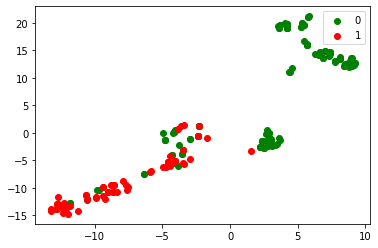

In [112]:
tsne_vis(experiment, 27)

### NCI1

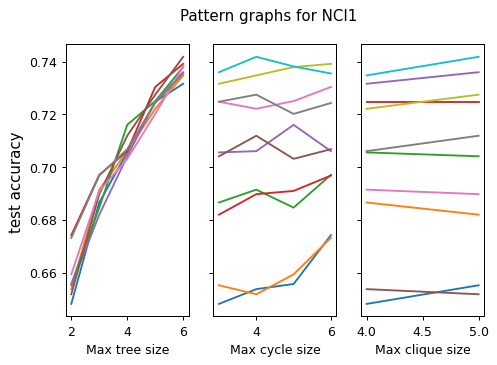

In [163]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
make_big_plot(experiment)


In [164]:
leaderboard(experiment, 3)

[(29,
  {'n_trees': 6, 'n_cycles': 4, 'n_cliques': 5},
  0.7418491484184916,
  0.03180654549607573),
 (19,
  {'n_trees': 6, 'n_cycles': 6, 'n_cliques': 4},
  0.7391727493917275,
  0.03538954323226611),
 (34,
  {'n_trees': 6, 'n_cycles': 5, 'n_cliques': 5},
  0.7381995133819951,
  0.030060233988283225)]

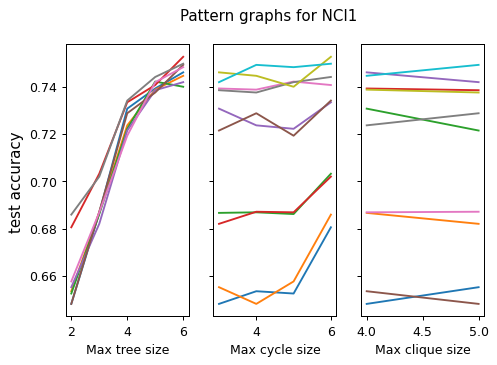

In [165]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/NCI1', 
    encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'NCI1')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
make_big_plot(experiment)

In [166]:
leaderboard(experiment, 3)

[(19,
  {'n_trees': 6, 'n_cycles': 6, 'n_cliques': 4},
  0.7525547445255475,
  0.03905166336535088),
 (39,
  {'n_trees': 6, 'n_cycles': 6, 'n_cliques': 5},
  0.7496350364963504,
  0.041383278036754935),
 (29,
  {'n_trees': 6, 'n_cycles': 4, 'n_cliques': 5},
  0.7491484184914842,
  0.04241469835137629)]

### PROTEINS


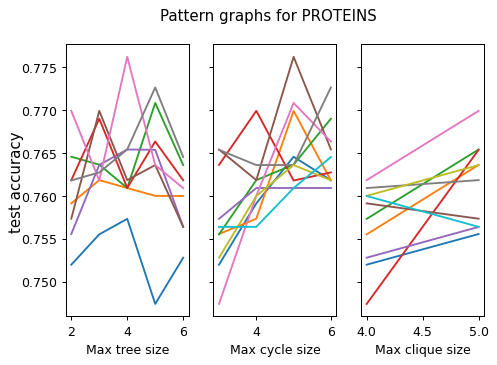

In [170]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
              encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'PROTEINS')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
#leaderboard(experiment, 3)
make_big_plot(experiment)


In [171]:
leaderboard(experiment, 5)

[(32,
  {'n_trees': 4, 'n_cycles': 5, 'n_cliques': 5},
  0.7762146074646075,
  0.03555512936468483),
 (38,
  {'n_trees': 5, 'n_cycles': 6, 'n_cliques': 5},
  0.7726431788931788,
  0.03320233476931544),
 (13,
  {'n_trees': 5, 'n_cycles': 5, 'n_cliques': 4},
  0.770841377091377,
  0.027077646919877345),
 (26,
  {'n_trees': 3, 'n_cycles': 4, 'n_cliques': 5},
  0.769916344916345,
  0.03728956791043848),
 (30,
  {'n_trees': 2, 'n_cycles': 5, 'n_cliques': 5},
  0.7699083011583012,
  0.030992094524506658)]

lagrangian:

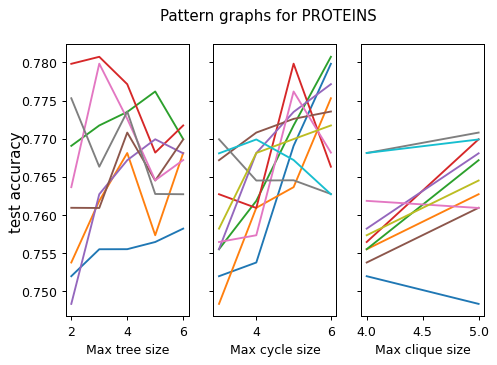

In [168]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/PROTEINS', 
              encoder_name = 'lagrangian_aug', n_trees=7, n_cycles=7, n_cliques=6,
    loading_mode = True, dataset_name = 'PROTEINS')
#make_tree_plot(experiment)
#make_cycle_plot(experiment)
#make_clique_plot(experiment)
make_big_plot(experiment)


In [169]:
leaderboard(experiment, 5)

[(16,
  {'n_trees': 3, 'n_cycles': 6, 'n_cliques': 4},
  0.7807351994851995,
  0.04167235669346859),
 (31,
  {'n_trees': 3, 'n_cycles': 5, 'n_cliques': 5},
  0.7798342985842985,
  0.034209081635347964),
 (15,
  {'n_trees': 2, 'n_cycles': 6, 'n_cliques': 4},
  0.7798182110682111,
  0.03201369318103032),
 (17,
  {'n_trees': 4, 'n_cycles': 6, 'n_cliques': 4},
  0.7771476833976835,
  0.03717020940159856),
 (13,
  {'n_trees': 5, 'n_cycles': 5, 'n_cliques': 4},
  0.7761904761904763,
  0.034954811168041756)]

### ogbg-molhiv

In [ ]:
experiment = experiments.patternExperiment(
    dataset = None, folder_name = 'pattern_graphs/ogbg-molhiv', 
    encoder_name = 'ghc_aug', n_trees=7, n_cycles=7, n_cliques=6)
#experiment.evaluation(clf_name='Random_forest', cv_num = 10, scoring='roc_auc')


# drafts

In [82]:
x = torch.tensor([[1, 1, 0, 0], [1, 0, 2, 0], [1, 0, 0, 3]])

In [112]:
single_index = torch.tensor([0,1,2,3])
indx_tensor = torch.combinations(torch.arange(4), 2, with_replacement=True).t().tolist()
edge_embd = [1,2]
i_array = list(zip(edge_embd, indx_tensor))
i_array

[(1, [0, 0, 0, 0, 1, 1, 1, 2, 2, 3]), (2, [0, 1, 2, 3, 1, 2, 3, 2, 3, 3])]

In [113]:
torch.stack([x[i] for i in i_array])

tensor([[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
        [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]])

In [114]:
yy = torch.stack([torch.stack([x[i] for i in i_array]),torch.stack([x[i] for i in i_array])])
yy

tensor([[[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
         [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]],

        [[1, 1, 1, 1, 0, 0, 0, 2, 2, 0],
         [1, 0, 0, 3, 0, 0, 3, 0, 3, 3]]])

In [115]:
torch.prod(yy, dim = 1)

tensor([[1, 0, 0, 3, 0, 0, 0, 0, 6, 0],
        [1, 0, 0, 3, 0, 0, 0, 0, 6, 0]])

In [116]:
torch.prod(torch.stack([x[i] for i in i_array]), dim = 0)

tensor([1, 0, 0, 3, 0, 0, 0, 0, 6, 0])

In [34]:
maybe = torch.stack([aug_x[i, idt] for i,idt in enumerate(indx_tensor)])
torch.prod(maybe, dim = 0)

tensor([1.0000, 2.0000, 2.1000, 2.2000, 2.0000, 2.1000, 2.2000, 2.3100, 2.4200,
        2.6400, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2310, 0.2420,
        0.2640, 0.5280])

In [35]:
torch.prod(maybe.t(), dim = -1).contiguous()

tensor([1.0000, 2.0000, 2.1000, 2.2000, 2.0000, 2.1000, 2.2000, 2.3100, 2.4200,
        2.6400, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2310, 0.2420,
        0.2640, 0.5280])

In [19]:
aug_x.size(), indx_tensor.size()
indx_tensor2 = indx_tensor.clone()

(torch.Size([3, 4]), torch.Size([3, 20]))

In [26]:
tuple(torch.arange(4).tolist())

(0, 1, 2, 3)

In [30]:
a = torch.tensor([[10, 3]])
b = torch.arange()

tensor(0.)

In [118]:
list(a.size())

[3, 3]